## Init

In [125]:
library(dplyr)
library(corrplot)
library(ggplot2)
library(vcd)
library(car)

theme_sleepy <- theme_minimal() + theme(
    panel.grid.major = element_line(color = "#3e63ca55"),
    axis.line.x = element_line(color = "#3e63ca", size = 1),
    axis.line.y = element_line(color = "#3e63ca", size = 1),

    title = element_text(size = 28, color = "#2a4285"),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14)
)
data <- read.csv("data\\Sleep_health_and_lifestyle_dataset.csv")
cat("General overview:\n")
glimpse(data)

General overview:
Rows: 374
Columns: 13
$ Person.ID               <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,…
$ Gender                  <chr> "Male", "Male", "Male", "Male", "Male", "Male"…
$ Age                     <int> 27, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29…
$ Occupation              <chr> "Software Engineer", "Doctor", "Doctor", "Sale…
$ Sleep.Duration          <dbl> 6.1, 6.2, 6.2, 5.9, 5.9, 5.9, 6.3, 7.8, 7.8, 7…
$ Quality.of.Sleep        <int> 6, 6, 6, 4, 4, 4, 6, 7, 7, 7, 6, 7, 6, 6, 6, 6…
$ Physical.Activity.Level <int> 42, 60, 60, 30, 30, 30, 40, 75, 75, 75, 30, 75…
$ Stress.Level            <int> 6, 8, 8, 8, 8, 8, 7, 6, 6, 6, 8, 6, 8, 8, 8, 8…
$ BMI.Category            <chr> "Overweight", "Normal", "Normal", "Obese", "Ob…
$ Blood.Pressure          <chr> "126/83", "125/80", "125/80", "140/90", "140/9…
$ Heart.Rate              <int> 77, 75, 75, 85, 85, 85, 82, 70, 70, 70, 70, 70…
$ Daily.Steps             <int> 4200, 10000, 10000, 3000, 3000, 3000, 3500, 80…


## Описовий аналіз

### Quality of sleep

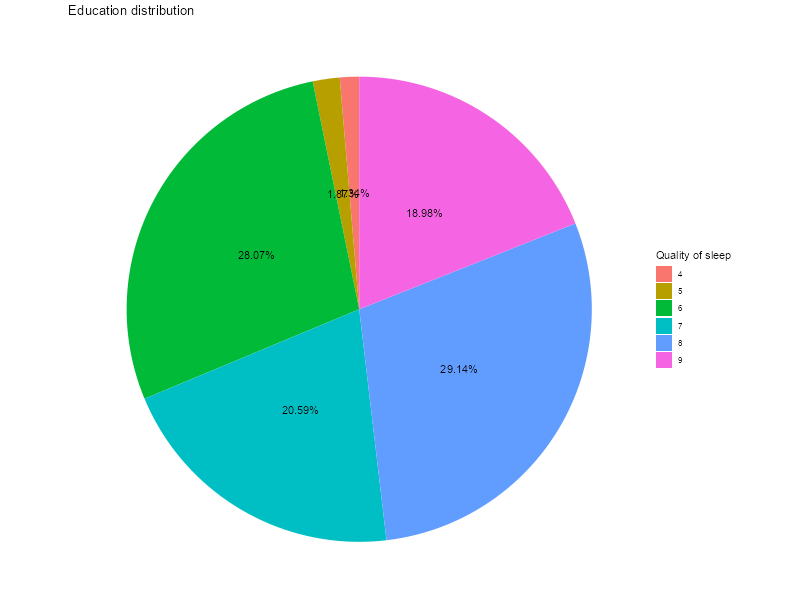

In [4]:
ggplot(data, aes(x = "", fill = as.factor(Quality.of.Sleep))) +
  geom_bar(width = 1) +
  coord_polar(theta = "y") +
  labs(title = "Education distribution", fill = "Quality of sleep") +
  geom_text(aes(label = scales::percent(..count../sum(..count..))), stat = "count", position = position_stack(vjust = 0.5)) +
  theme_void()

### Correlation matrix

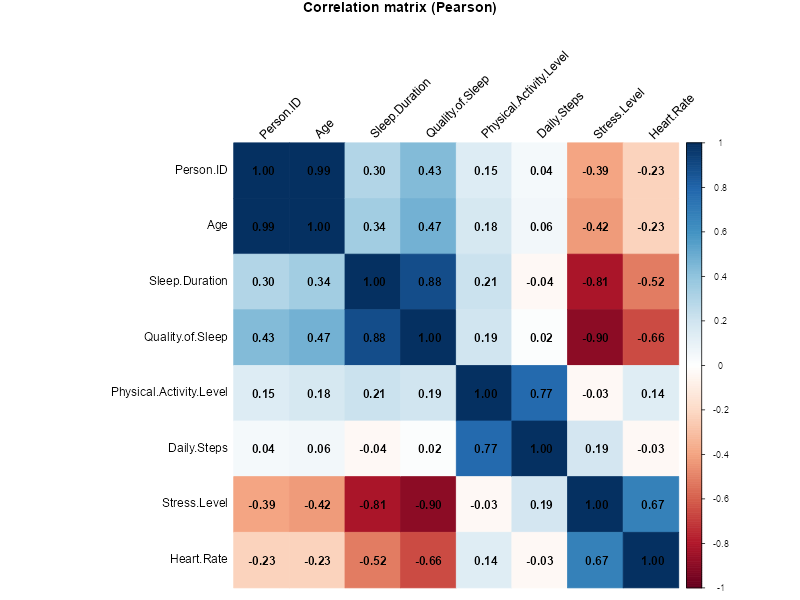

In [53]:
data |>
  select_if(is.numeric) |>
  cor(method = "pearson") |>
  corrplot(method = "color", col = COL2("RdBu", 200), order = "hclust",
         addCoef.col = "black", tl.col = "black", tl.srt = 45,
         title = "Correlation matrix (Pearson)", mar=c(0,0,1,0))

### Age and sleep quality

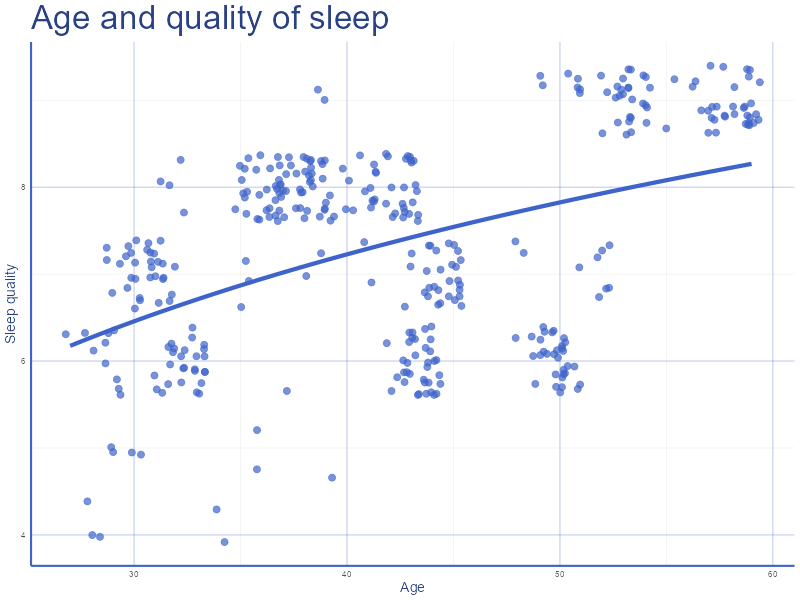

In [126]:
ggplot(data, aes(Age, Quality.of.Sleep)) +
  geom_jitter(alpha = 0.7, color = "#3e63ca", size = 3) +
  geom_smooth(method = "lm", formula = y ~ log(x), se = FALSE, color = "#3e63ca", size = 2) +
  labs(title = "Age and quality of sleep", x = "Age", y = "Sleep quality") +
  theme_sleepy

### Sleep duration and its quality 

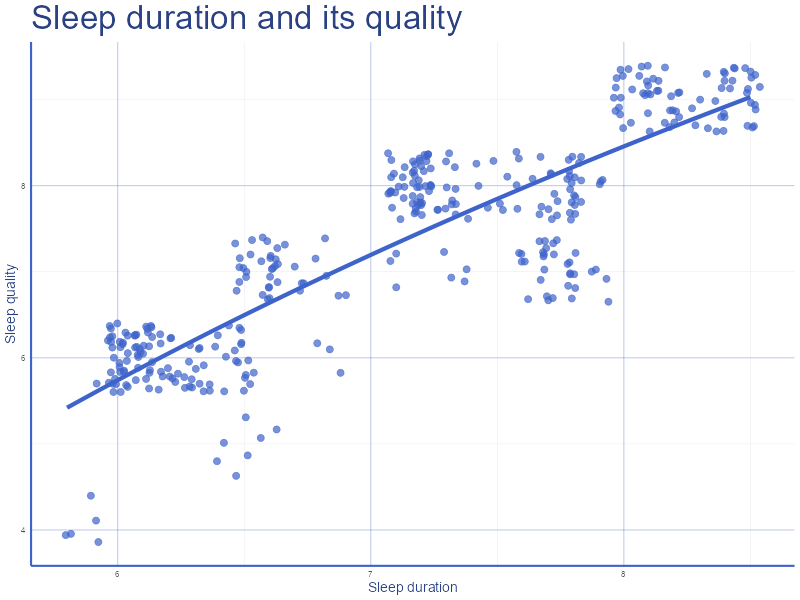

In [127]:
ggplot(data, aes(Sleep.Duration, Quality.of.Sleep)) +
  geom_jitter(alpha = 0.7, color = "#3e63ca", size = 3) +
  geom_smooth(method = "lm", formula = y ~ log(x), se = FALSE, color = "#3e63ca", size = 2) +
  labs(title = "Sleep duration and its quality", x = "Sleep duration", y = "Sleep quality") +
  theme_sleepy

### Stress level and sleep quality

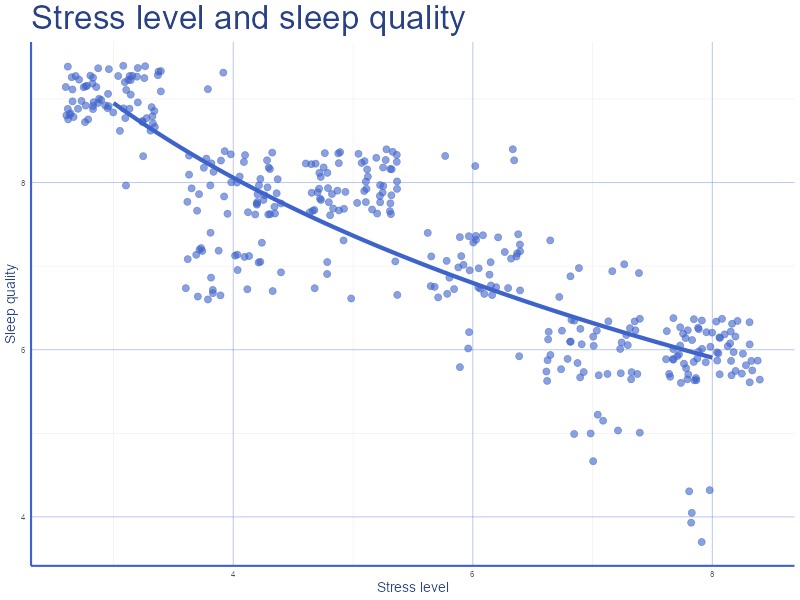

In [128]:
ggplot(data, aes(Stress.Level, Quality.of.Sleep)) +
  geom_jitter(alpha = 0.6, color = "#3e63ca", size = 3) +
  geom_smooth(method = "lm", formula = y ~ log(x), se = FALSE, color = "#3e63ca", size = 2) +
  labs(title = "Stress level and sleep quality", x = "Stress level", y = "Sleep quality") +
  theme_sleepy

### Heart rate and sleep quality

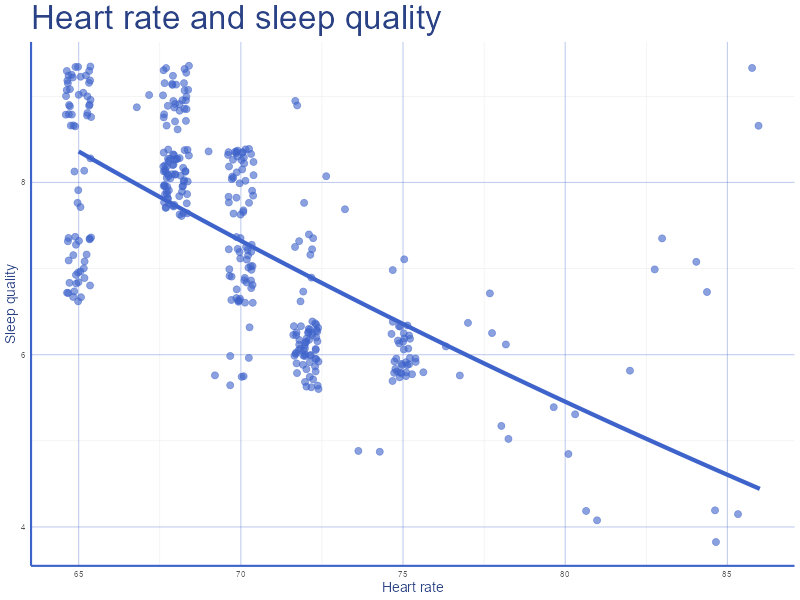

In [129]:
ggplot(data, aes(Heart.Rate, Quality.of.Sleep)) +
  geom_jitter(alpha = 0.6, color = "#3e63ca", size = 3) +
  geom_smooth(method = "lm", formula = y ~ log(x), se = FALSE, color = "#3e63ca", size = 2) +
  labs(title = "Heart rate and sleep quality", x = "Heart rate", y = "Sleep quality") +
  theme_sleepy